In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [2]:
X1,y1=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,\
    n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

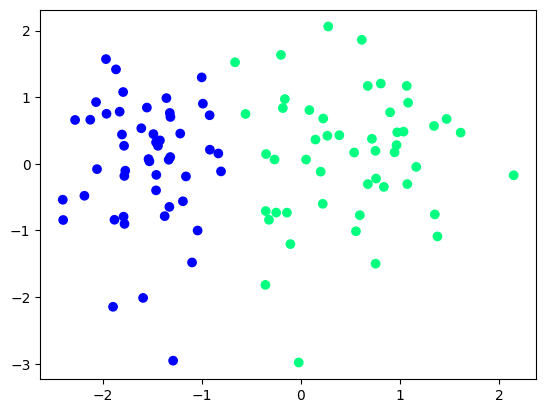

In [3]:
plt.scatter(X1[:,0],X1[:,1],c=y1,cmap='winter')
plt.show()

In [4]:
#perceptron trick class
class Perceptron:
    
    #intialisation
    def __init__(self,epochs=1000,lr=0.1):
        self.epochs=epochs
        self.lr=lr
        
        
    def trick(self,X,y):
        X=np.insert(X,0,1,axis=1)
        weights=np.ones(X.shape[1])
        for i in range(self.epochs):
            #select a random row
            j=np.random.randint(0,100)
            #calculate the prediction
            y_hat=self.step(np.dot(X[j],weights))
            #update weights
            weights=weights+self.lr*(y[j]-y_hat)*X[j]
        #intercept and coeffients values
        return weights[0],weights[1:]
    
    #step function
    def step(self,z):
        return 1 if z>0 else 0

In [5]:
pt=Perceptron()

In [6]:
#intercept and coefficient values found using perceptron trick
intercept1,coeff1=pt.trick(X1,y1)

In [7]:
print(f'The intercept is {intercept1}')
print(f'The coeffients are {coeff1}')

The intercept is 1.0
The coeffients are [1.31828686 0.14888222]


In [8]:
#find the slope and value of b using these values
#m=-A/B,b=-C/B
m1=-(coeff1[0]/coeff1[1])
b1=-(intercept1/coeff1[1])

In [9]:
print(f'The slope is {m1}')
print(f'The intercept is {b1}')

The slope is -8.854562363775102
The intercept is -6.716718969360474


In [10]:
X_input1=np.linspace(-3,3,100)
y_input_1=m1*X_input1+b1

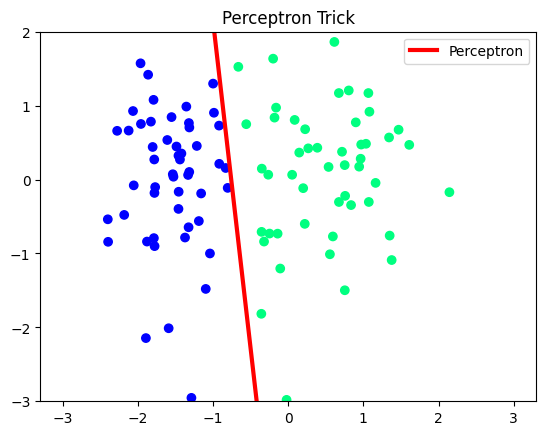

In [11]:
#plot the line
plt.title('Perceptron Trick')
plt.scatter(X1[:,0],X1[:,1],c=y1,cmap='winter')
plt.plot(X_input1,y_input_1,'r',linewidth=3,label='Perceptron')
plt.legend()
plt.ylim(-3,2)
plt.show()

In [12]:
#create object of sklearn logistic regression
lor=LogisticRegression()
#fit the data
lor.fit(X1,y1)

LogisticRegression()

In [13]:
#calculate slope and intercept found by sklearn logistic regression
m2=-(lor.coef_[0][0]/lor.coef_[0][1])
b2=-(lor.intercept_/lor.coef_[0][1])

In [14]:
X_input2=np.linspace(-3,3,100)
y_input_2=m2*X_input2+b2

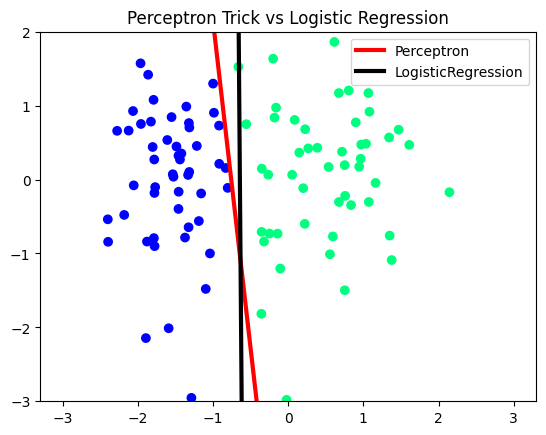

In [15]:
#compare the line found by perceptron trick and logistic regression
plt.title('Perceptron Trick vs Logistic Regression')
plt.scatter(X1[:,0],X1[:,1],c=y1,cmap='winter')
plt.plot(X_input1,y_input_1,'r',linewidth=3,label='Perceptron')
plt.plot(X_input2,y_input_2,'black',linewidth=3,label='LogisticRegression')
plt.ylim(-3,2)
plt.legend()
plt.show()

Problem with Perceptron

In [16]:
X2,y2=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,\
    n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=25)

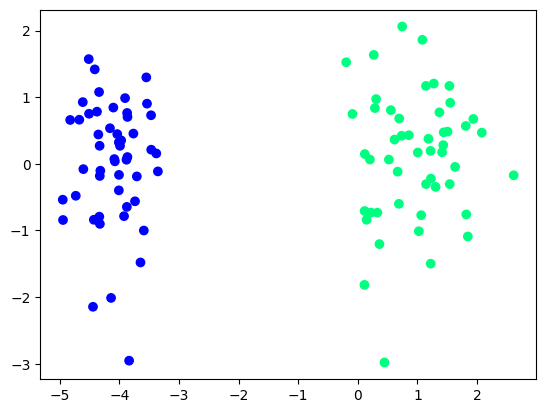

In [17]:
plt.scatter(X2[:,0],X2[:,1],c=y2,cmap='winter')
plt.show()

In [18]:
intercept2,coeff2=pt.trick(X2,y2)

In [19]:
m3=-(coeff2[0]/coeff2[1])
b3=-(intercept2/coeff2[1])

In [20]:
X_input3=np.linspace(-3,3,100)
y_input_3=m3*X_input3+b3

In [21]:
lor1=LogisticRegression()
lor1.fit(X2,y2)

LogisticRegression()

In [22]:
m4=-(lor1.coef_[0][0]/lor1.coef_[0][1])
b4=-(lor1.intercept_/lor1.coef_[0][1])

In [23]:
X_input4=np.linspace(-3,3,100)
y_input_4=m4*X_input4+b4

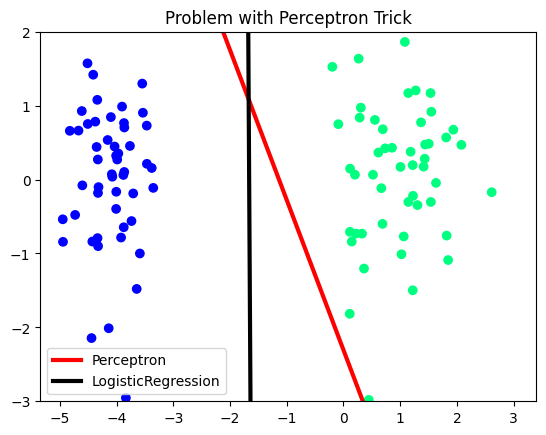

In [24]:
#plot the lines
plt.scatter(X2[:,0],X2[:,1],c=y2,cmap='winter')
plt.title('Problem with Perceptron Trick')
plt.plot(X_input3,y_input_3,'r',linewidth=3,label='Perceptron')
plt.plot(X_input4,y_input_4,'Black',linewidth=3,label='LogisticRegression')
plt.ylim(-3,2)
plt.legend()
plt.show()

Using Sigmoid Function

In [25]:
#sigmoid class
class Sigmoid:
    
    #intialisation
    def __init__(self,epochs=1000,lr=0.1):
        self.epochs=epochs
        self.lr=lr
        
        
    def func(self,X,y):
        X=np.insert(X,0,1,axis=1)
        weights=np.ones(X.shape[1])
        for i in range(self.epochs):
            #select a random row
            j=np.random.randint(0,100)
            #calculate the prediction
            y_hat=self.sigma(np.dot(X[j],weights))
            #update weights
            weights=weights+self.lr*(y[j]-y_hat)*X[j]
        #intercept and coeffients values
        return weights[0],weights[1:]
    
    #sigmoid function
    def sigma(self,z):
        return 1/(1+np.exp(-z))


In [26]:
sig1=Sigmoid()

In [27]:
intercept3,coeff3=sig1.func(X2,y2)

In [28]:
m5=-(coeff3[0]/coeff3[1])
b5=-(intercept3/coeff3[1])

In [29]:
X_input5=np.linspace(-3,3,100)
y_input_5=m5*X_input5+b5

In [30]:
lor2=LogisticRegression()
lor2.fit(X2,y2)

LogisticRegression()

In [31]:
m6=-(lor2.coef_[0][0]/lor2.coef_[0][1])
b6=-(lor2.intercept_/lor2.coef_[0][1])

In [32]:
X_input6=np.linspace(-3,3,100)
y_input_6=m6*X_input6+b6

In [33]:
pt1=Perceptron()
intercept4,coeff4=pt1.trick(X2,y2)

In [34]:
m7=-(coeff4[0]/coeff4[1])
b7=-(intercept4/coeff4[1])

In [35]:
X_input7=np.linspace(-3,3,100)
y_input_7=m7*X_input7+b7

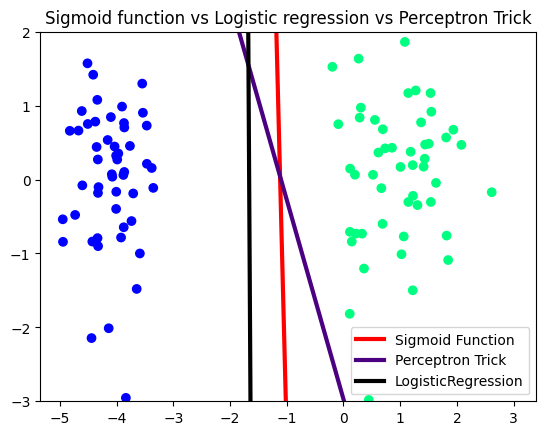

In [36]:
plt.scatter(X2[:,0],X2[:,1],c=y2,cmap='winter')
plt.title('Sigmoid function vs Logistic regression vs Perceptron Trick')
plt.plot(X_input5,y_input_5,'r',linewidth=3,label='Sigmoid Function')
plt.plot(X_input7,y_input_7,'Indigo',linewidth=3,label='Perceptron Trick')
plt.plot(X_input6,y_input_6,'Black',linewidth=3,label='LogisticRegression')
plt.ylim(-3,2)
plt.legend()
plt.show()

Using Gradient Descent

In [37]:
#gradient descent class
class GradientDescent:
    def __init__(self,lr=0.1,epochs=5000):
        self.lr=lr
        self.epochs=epochs
        
    def fit(self,X,y):
        X=np.insert(X,0,1,axis=1)
        weights=np.ones(X.shape[1])
        for i in range(self.epochs):
            y_hat=self.sigma(np.dot(X,weights))
            weights=weights+self.lr*(np.dot((y-y_hat),X)/X.shape[0])
        return weights[0],weights[1:]
            
    def sigma(self,z):
        return 1/(1+np.exp(-z))

In [58]:
gd=GradientDescent(lr=0.9,epochs=10000)

In [59]:
intercept5,coeff5=gd.fit(X2,y2)

In [60]:
m8=-(coeff5[0]/coeff5[1])
b8=-(intercept5/coeff5[1])

In [61]:
X_input8=np.linspace(-3,3,100)
y_input_8=m8*X_input8+b8

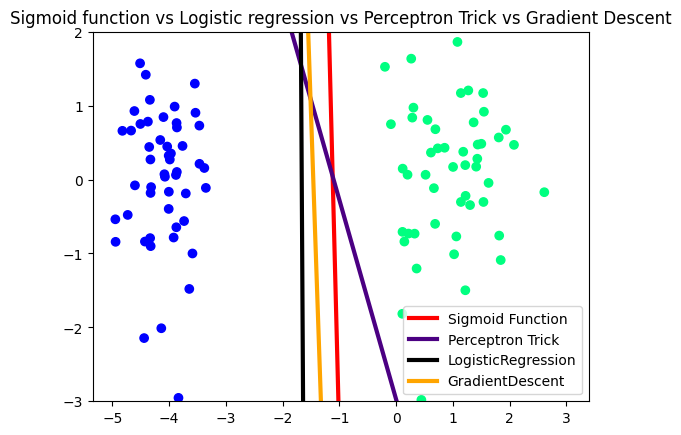

In [63]:
plt.scatter(X2[:,0],X2[:,1],c=y2,cmap='winter')
plt.title('Sigmoid function vs Logistic regression vs Perceptron Trick vs Gradient Descent')
plt.plot(X_input5,y_input_5,'r',linewidth=3,label='Sigmoid Function')
plt.plot(X_input7,y_input_7,'Indigo',linewidth=3,label='Perceptron Trick')
plt.plot(X_input6,y_input_6,'Black',linewidth=3,label='LogisticRegression')
plt.plot(X_input8,y_input_8,'Orange',linewidth=3,label='GradientDescent')
plt.ylim(-3,2)
plt.legend()
plt.show()